In [1]:
# Importing the libraries.
# Importing the library for linear algebra.
import numpy as np 

# Importing the library for data processing.
import pandas as pd 

# Importing libraries for data visualization.
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


In [2]:
# Importing Algorithms.
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [3]:
# Extracting dataset.
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [4]:
# Performing data exploration.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# The training dataset has 891 examples and 11 features plus the target variable: 'Survived'.
# 2 of the features are floats, 5 are integers and 5 are objects.
# Some features contain missing values, like the 'Age' feature and 'Cabin', 'Embarked'.

In [6]:
# Summary of features.
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# 38% out of the training-set survived the Titanic. 
# Passenger ages range from 0.4 to 80. 

In [8]:
# View first few rows.
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [9]:
# From here we note;
# (1) the need to convert some features into numeric ones so that machine learning algorithms can process them. 
# (2) some features have widely different ranges that we will need to convert into roughly similar scale. 
# (3) some features contain missing values (NaN = not a number)

In [13]:
# View missing data in detail.
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [14]:
# Embarked feature has only 2 missing values, which can easily be filled. 
# 'Age' feature, which has 177 missing values. 
# 'Cabin' feature needs further investigation but we may need to drop it from the dataset, since 77% of it are missing.

In [15]:
# What features could contribute to a high survival rate?
# View the columns
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [16]:
# Everything except 'PassengerId', 'Ticket' and 'Name' may play a part.
# Correlate each of these with a high survival rate.

C:\Users\Tinashe.Kaseke\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


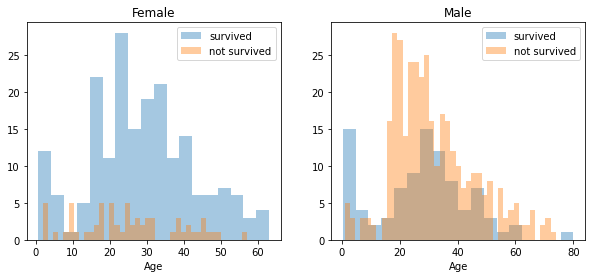

In [17]:
# (1) Age and Sex
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [19]:
# Men have a high probability of survival when they are between 18 and 30 years old, 
# This is also a little bit true for women but not entirely. For women the survival chances are higher between 14 and 40
# Men between the age of 5 and 18 have low probability of survival, but that is not true for women. 
# Infants also have a little bit higher probability of survival.
# Therefore certain ages have increased odds of survival and for every feature to be roughly on the same scale, we will create age groups

C:\Users\Tinashe.Kaseke\python\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


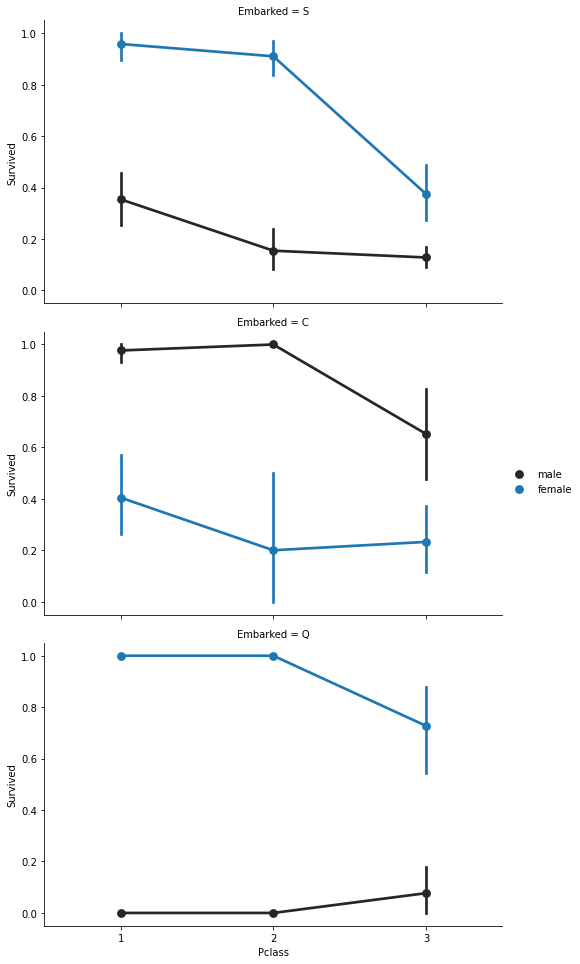

In [20]:
# (2) Embarked, Pclass and Sex:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [21]:
# Embarked seems to be correlated with survival, depending on the gender.
# Women on port Q and on port S have a higher chance of survival. 
# Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.
# Pclass also seems to be correlated with survival. We will generate another plot of it below

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

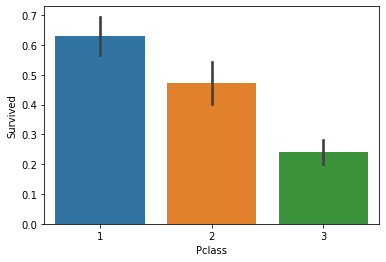

In [22]:
# (3) Pclass
sns.barplot(x='Pclass', y='Survived', data=train_df)

In [23]:
# Pclass clearly contributes to a person's chance of survival, especially if this person is in class 1
# Another Pclass plot below;

C:\Users\Tinashe.Kaseke\python\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


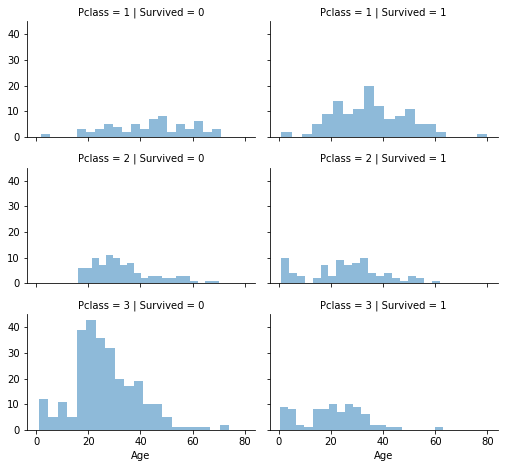

In [24]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [25]:
# This plot confirms our assumption about pclass 1. 
# However we can also spot a high probability that a person in pclass 3 will not survive.

In [27]:
# (4) SibSp and Parch
# Make more sense as a combined feature that shows the total number of relatives a person has on the Titanic.
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

C:\Users\Tinashe.Kaseke\python\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Tinashe.Kaseke\python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


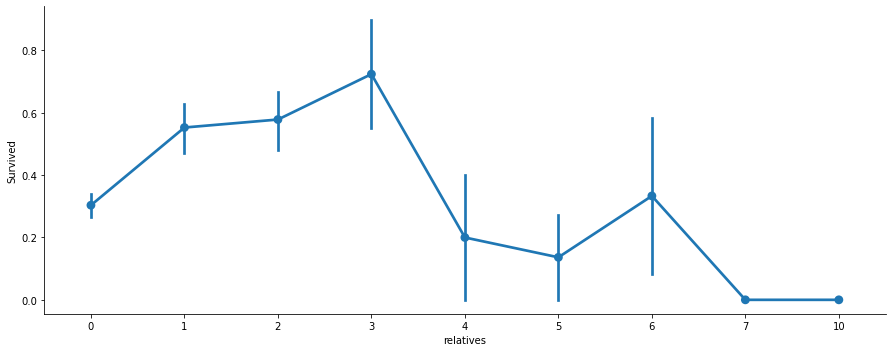

In [28]:
# Plot to see chances of survival if you have relatives
axes = sns.factorplot('relatives','Survived', 
                      data=train_df, aspect = 2.5, )

In [30]:
# You had a high probability of survival with 1 to 3 relatives.
# A person had lower probability of surviving if they had less than 1 or more than 3 (except for some cases with 6 relatives)

In [31]:
# Data Preprocessing
# Drop 'PassengerId' from the train set, because it does not contribute to a person's survival probability.
# It will not be dropped from the test set, since it is required there for the submission.
train_df = train_df.drop(['PassengerId'], axis=1)

In [32]:
# Missing Data:
# we have to deal with Cabin (687), Embarked (2) and Age (177)


In [36]:
# Cabin:
# A cabin number looks like 'C123' and the letter refers to the deck. 
# Therefore we are going to extract these and create a new feature, that contains a person's deck. 
# Afterwords we will convert the feature into a numeric variable. The missing values will be converted to zero. 
# In the picture below you can see the actual decks of the titanic, ranging from A to G.

In [34]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

In [35]:
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [37]:
# Age:
# Age has missing values. 
# Create an array that contains random numbers computed based on the mean age value in regards to the standard deviation and is_null.
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

In [38]:
# Embarked:
# has only 2 missing values which we will fill with the most common one.
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [39]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [40]:
# Converting Features:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


In [41]:
# 'Fare' is a float 
# We also have to deal with 4 categorical features: Name, Sex, Ticket and Embarked

In [42]:
# Fare:
# Convert from float to int64, using the 'astype()' function in Pandas.
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [43]:
# Name:
# Extract the Titles from the Name, so that we can build a new feature out of that.
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [44]:
# Sex:
# Convert 'Sex' feature into numeric.

In [45]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [46]:
# Ticket:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [47]:
# Ticket feature has 681 unique tickets, it will be a bit tricky to convert them into useful categories.
# Therefore we will drop it from the dataset.
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [49]:
# Embarked:
# Convert 'Embarked' feature into numeric.
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [51]:
# Creating Categories:
# We will now create categories within the following features:

In [52]:
# Age:
# Convert it from float into integer. 
# Then create a new 'AgeGroup' variable, by categorizing every age into a group.
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6


In [53]:
# View how it's distributed 
train_df['Age'].value_counts()

4    170
5    160
6    159
3    126
2    119
1     89
0     68
Name: Age, dtype: int64

In [54]:
# Fare:
# Need to do the same as with the 'Age' feature. 
# But it is not that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. 
# Use sklearn "qcut()"" function to form the categories
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,8,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,8,1
5,0,3,0,5,0,0,8,2,0,1,8,1
6,0,1,0,6,0,0,51,0,0,1,5,1
7,0,3,0,0,3,1,21,0,4,0,8,4
8,1,3,1,3,0,2,11,0,2,0,8,3
9,1,2,1,1,1,0,30,1,1,0,8,3


In [55]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [56]:
# Creating new Features
# Add two new features to the dataset computed out of other features.

# (1) Age times Class
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [58]:
# (2) Fare per Person

for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [59]:
# Inspecting the training set before we start training the models.
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,5,0,0,1,2,0,1,8,1,15,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


In [60]:
# Building Machine Learning Models
# Train several Machine Learning models and compare their results. 
# Because the dataset does not provide labels for their testing-set, we need to use the predictions on the training set to compare the algorithms with each other. 
# Later on, we will use cross validation.

In [61]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [62]:
# Stochastic Gradient Descent (SGD):

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [63]:
# Random Forest:

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [64]:
# Logistic Regression:

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

C:\Users\Tinashe.Kaseke\python\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [65]:
# K Nearest Neighbor:

# KNN 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [68]:
# Gaussian Naive Bayes:

gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [69]:
# Perceptron:

perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

C:\Users\Tinashe.Kaseke\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [70]:
# Linear Support Vector Machine:

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

C:\Users\Tinashe.Kaseke\python\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [71]:
#Decision Tree

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [72]:
# Which is the best Model ?
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.59,Random Forest
92.59,Decision Tree
85.19,KNN
82.15,Support Vector Machines
81.93,Logistic Regression
80.25,Perceptron
79.57,Stochastic Gradient Decent
77.89,Naive Bayes


In [73]:
# Random Forest classifier is on first place. 
# But check how random-forest performs when we use cross validation.

In [74]:
# K-Fold Cross Validation:
# randomly splits the training data into K subsets called folds.
# If 4 folds, our random forest model would be trained and evaluated 4 times, using a different fold for evaluation everytime, while it would be trained on the remaining 3 folds.
# The result of our K-Fold Cross Validation example would be an array that contains 4 different scores. We then compute the mean and the standard deviation for these scores
# using 10 folds (K = 10). Therefore it outputs an array with 10 different scores
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77777778 0.83146067 0.73033708 0.86516854 0.85393258 0.84269663
 0.83146067 0.78651685 0.85393258 0.85393258]
Mean: 0.8227215980024969
Standard Deviation: 0.04140228795636097


In [75]:
# This looks much more realistic. 
# Our model has a average accuracy of 82% with a standard deviation of 4 % (accuracy of our model can differ + — 4%).
# we will try to increase it’s performance even further below.

In [76]:
# Feature Importance
# With random forest it is very easy to measure the relative importance of each feature. 
# Sklearn measure a feature's importance by looking at how much the tree nodes, that use that feature, reduce impurity on average (across all trees in the forest). 
# It computes this score automatically for each feature after training and scales the results so that the sum of all importances is equal to 1:

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.216
Sex,0.153
Age_Class,0.104
Deck,0.083
Pclass,0.078
Age,0.074
Fare,0.062
relatives,0.056
Embarked,0.054


<AxesSubplot:xlabel='feature'>

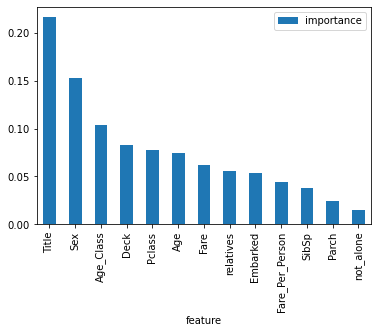

In [77]:
importances.plot.bar()

In [78]:
# Conclusion;
# not_alone and Parch doesn’t play a significant role in our random forest classifiers prediction process. 
# Because of that, drop them from the dataset and train the classifier again. 
train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

In [79]:
# Training random forest again:

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.59 %


C:\Users\Tinashe.Kaseke\python\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [80]:
# random forest model predicts as wekk as it did before. 
# A general rule is that, the more features you have, the more likely your model will suffer from overfitting and vice versa.
# But our data seems fine and does not have too many features

In [81]:
# Start tuning the hyperameters of random forest.
# code for the hyperparamter tuning for the parameters criterion, min_samples_leaf, min_samples_split and n_estimators below
# takes a long time to run it
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
clf.bestparams

C:\Users\Tinashe.Kaseke\python\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


AttributeError: 'GridSearchCV' object has no attribute 'bestparams'

In [82]:
# Test new Parameters:

random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

C:\Users\Tinashe.Kaseke\python\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


oob score: 82.6 %


In [83]:
# Now we have a proper model, we start evaluating its performace in a more accurate way
# we only used accuracy and the oob score, which is just another form of accuracy but it’s more complicated to evaluate a classification model than a regression model

In [84]:
# Further Evaluation
# Confusion Matrix:

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

C:\Users\Tinashe.Kaseke\python\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Tinashe.Kaseke\python\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Tinashe.Kaseke\python\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([[489,  60],
       [ 93, 249]], dtype=int64)

In [86]:
# The first row is about the not-survived-predictions: 
# 493 passengers were correctly classified as not survived (called true negatives) 
# and 56 where wrongly classified as not survived (false positives).

# The second row is about the survived-predictions: 
# 93 passengers where wrongly classified as survived (false negatives) 
# and 249 where correctly classified as survived (true positives).

In [85]:
# Confusion matrix gives a lot of information about how well the model does, 
# but a way to get even more is computing the Classifiers Precision

In [87]:
# Precision and Recall:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8058252427184466
Recall: 0.7280701754385965


In [88]:
# Our model predicts 81% of the time, a passengers survival correctly (precision). 
# The recall tells us that it predicted the survival of 73 % of the people who actually survived.

In [89]:
# F-Score
# precision and recall can be combined into one score, the F-score. 
# F-score is computed with the harmonic mean of precision and recall. It assigns much more weight to low values. 
# As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7649769585253456

In [90]:
# a 77 % F-score - not that high, because we have a recall of 73%. 
# Unfortunately the F-score is not perfect because it favors classifiers that have a similar precision and recall. 
# This is a problem, because you sometimes want a high precision and sometimes a high recall. 
# An increasing precision sometimes results in an decreasing recall and vice versa (depending on the threshold)- the precision/recall tradeoff.

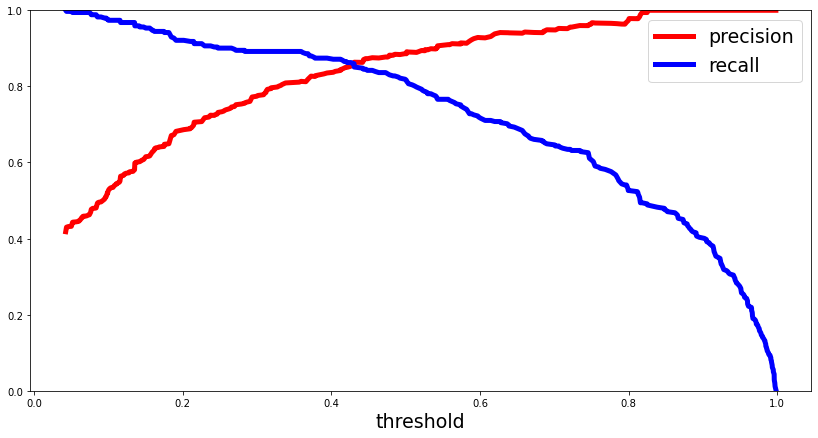

In [91]:
# Precision Recall Curve
# plot the precision and recall with the threshold using Matplotlib:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

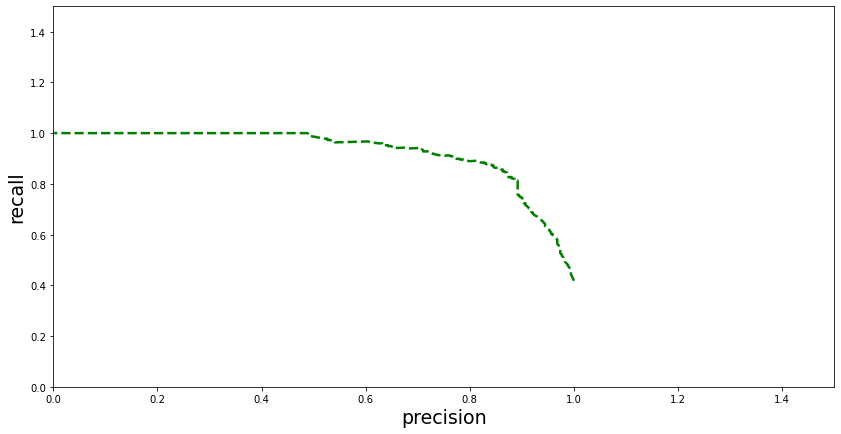

In [93]:
# The recall is falling of rapidly at a precision of around 85%. 
# Because of that, select the precision/recall tradeoff before that — maybe at around 75%.
# For a precision of 80%, we would need a threshold of around 0.4. 
# Then train a model with exactly that threshold and get the desired accuracy.

# Another way is to plot the precision and recall against each other:

def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

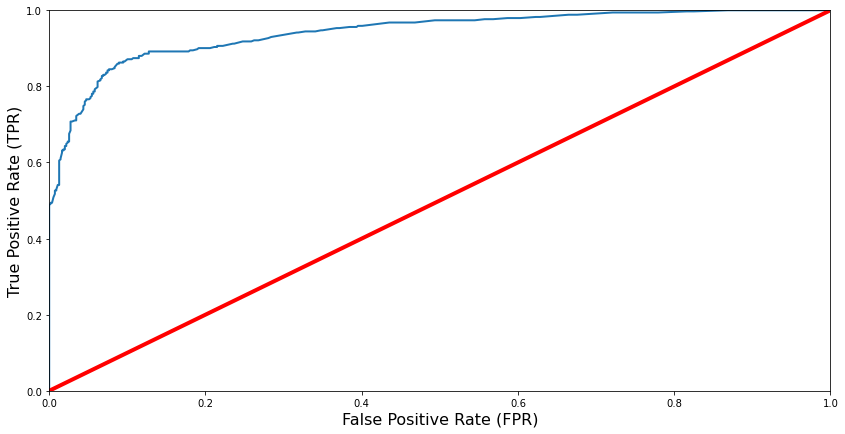

In [94]:
# ROC AUC Curve
# Another way to evaluate and compare our binary classifier.
# This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances),
# instead of plotting the precision versus the recall.

from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [95]:
# our classifier should be as far away from the red line as possible
# the red line represents a purely random classifier (e.g a coin flip) 
# therefore the Random Forest model seems to do a good job.
# there is also a tradeoff here, because the classifier produces more false positives, the higher the true positive rate is

In [96]:
# ROC AUC Score
# the corresponding score to the ROC AUC Curve. 
# It is computed by measuring the area under the curve.
# A classifier that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5.

from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9415550868671375


In [ ]:
# This score is good enough.